<a href="https://colab.research.google.com/github/flaghunter21/TensorFlow-Practice/blob/main/03_tensorflow_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision with TensorFlow

### Get the data

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-07-12 00:36:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  98.4MB/s    in 1.1s    

2022-07-12 00:36:09 (98.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [8]:
# Get the class names (programatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/') # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class names
print(class_names)

['pizza' 'steak']


So, we have got a collection of 750 training images and 250 testing images of pizza and steak.

In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

Image shape: (384, 512, 3)


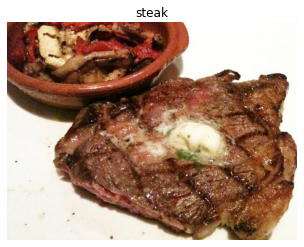

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [11]:
# View the img (actually just a big array/tensor)
img

array([[[166,  73,  40],
        [160,  67,  36],
        [144,  55,  23],
        ...,
        [247, 248, 242],
        [236, 237, 231],
        [223, 224, 218]],

       [[161,  68,  35],
        [157,  64,  33],
        [144,  55,  25],
        ...,
        [254, 255, 249],
        [250, 251, 245],
        [244, 245, 239]],

       [[158,  65,  32],
        [155,  64,  33],
        [146,  57,  27],
        ...,
        [255, 255, 250],
        [255, 255, 250],
        [255, 255, 250]],

       ...,

       [[244, 243, 225],
        [244, 242, 227],
        [244, 242, 227],
        ...,
        [250, 246, 235],
        [251, 247, 236],
        [251, 247, 236]],

       [[243, 242, 224],
        [243, 241, 226],
        [243, 241, 226],
        ...,
        [249, 245, 234],
        [250, 246, 235],
        [250, 246, 235]],

       [[243, 242, 224],
        [243, 242, 224],
        [243, 241, 226],
        ...,
        [249, 245, 234],
        [249, 245, 234],
        [249, 245, 234]]

In [12]:
# View the image shape
img.shape # (width, height, colour_channels)

(384, 512, 3)

In our case, the width and height vary but because we are dealing with colour images, the colour channels value is always 3. This is for different values of RGB pixels.

You'll notice all the values in the `img` array are between 0 and 255. This is because that is the possible range for red, green, and blue values. 

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

As we have discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [13]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.65098039, 0.28627451, 0.15686275],
        [0.62745098, 0.2627451 , 0.14117647],
        [0.56470588, 0.21568627, 0.09019608],
        ...,
        [0.96862745, 0.97254902, 0.94901961],
        [0.9254902 , 0.92941176, 0.90588235],
        [0.8745098 , 0.87843137, 0.85490196]],

       [[0.63137255, 0.26666667, 0.1372549 ],
        [0.61568627, 0.25098039, 0.12941176],
        [0.56470588, 0.21568627, 0.09803922],
        ...,
        [0.99607843, 1.        , 0.97647059],
        [0.98039216, 0.98431373, 0.96078431],
        [0.95686275, 0.96078431, 0.9372549 ]],

       [[0.61960784, 0.25490196, 0.1254902 ],
        [0.60784314, 0.25098039, 0.12941176],
        [0.57254902, 0.22352941, 0.10588235],
        ...,
        [1.        , 1.        , 0.98039216],
        [1.        , 1.        , 0.98039216],
        [1.        , 1.        , 0.98039216]],

       ...,

       [[0.95686275, 0.95294118, 0.88235294],
        [0.95686275, 0.94901961, 0.89019608],
        [0.95686275, 0

### An end-to-end example

From paper we use 50.76% as a baseline.

A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The architecture we are using below is a scaled-down version of VCG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up train and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode='binary', # type of problem we're working on
                                               seed=42)

valid_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Create a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10, 
                                                             kernel_size=3, # can also be (3, 3)
                                                             activation='relu', 
                                                             input_shape=(224,224,3)), # first layer specifies input shape (height, width, colour channel
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2,2)
                                                                padding='valid'), # padding can also be 'same'
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid') # binary activation output 
])

# Comple the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 35s 409ms/step - loss: 0.5589 - accuracy: 0.7060 - val_loss: 0.3956 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 13s 278ms/step - loss: 0.4300 - accuracy: 0.8027 - val_loss: 0.3559 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 13s 272ms/step - loss: 0.3851 - accuracy: 0.8313 - val_loss: 0.3954 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3585 - accuracy: 0.8400 - val_loss: 0.3464 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3237 - accuracy: 0.8673 - val_loss: 0.3034 - val_accuracy: 0.8680


In [15]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model.
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat baseline)
7. Repeat until satisfied.

We will step through each.

#### 1. Import and become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


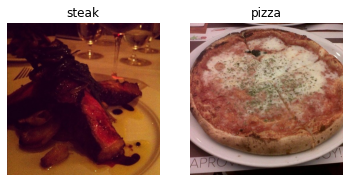

In [16]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

#### 2. Preprocess the data

For an image classification project, it is standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

In [17]:
# Define training and test directory paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time. 

There are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

In [18]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the `flow_from_directory` method.

In [19]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32, which is the same as the default.

In [20]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [21]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

Due to our `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.

In [22]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'`, our labels are either `0`(pizza) or `1`(steak).

#### 3. Create a model (start with a baseline)

To begin with, it is good to build a smaller model to acquire a baseline result which you try to improve upon.

In deep learning, a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [23]:
# Making the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [24]:
# Create the model (this can be our baseline, a 3 layer CNN)
model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding='valid',
                             activation='relu',
                             input_shape=(224,224,3)), # input layer (specify input shape)
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Some components of the `Conv2D` layer:
* The `"2D"` means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel individually.
* `filters` - these are the numbers of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3,3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each 1 pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `same` or `valid`, `same` adds zeros to the outside of the image so the resulting output of the convolutional layer is the same as the input, where as `valid` (default) cuts off excell pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.)

In [25]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#### 4. Fit a model

You will notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validtion_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [26]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [27]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 1.5788 - accuracy: 0.5747 - val_loss: 0.6240 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5331 - accuracy: 0.7587 - val_loss: 0.4392 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4441 - accuracy: 0.8080 - val_loss: 0.4524 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3441 - accuracy: 0.8587 - val_loss: 0.3940 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.2347 - accuracy: 0.9200 - val_loss: 0.4243 - val_accuracy: 0.8220


#### 5. Evaluate the model

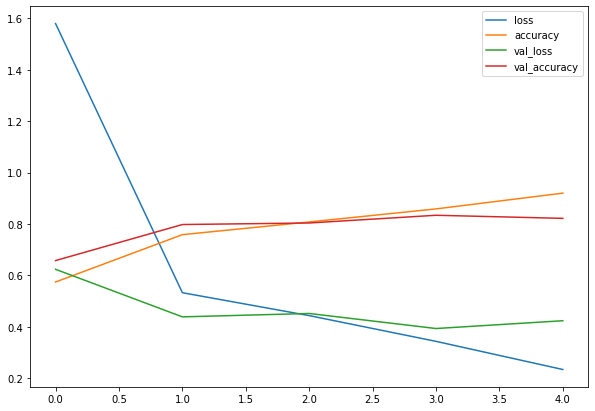

In [28]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

Judging by our loss curves, it looks like our model is **overfitting** the training dataset.

When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [29]:
# Plot the validation and training data seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

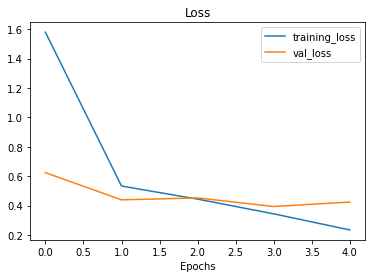

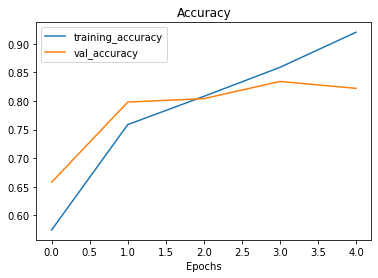

In [30]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there is a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [31]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
1. Create a baseline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

There are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

For the next few models we build, we are going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation

The first model will have the same structure as `model_4` but with a `MaxPool2D()` layer after each convolutional layer.

In [32]:
# Create the model
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')                     
])     

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features.

In [33]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [34]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6365 - accuracy: 0.6200 - val_loss: 0.5481 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4564 - accuracy: 0.7900 - val_loss: 0.3595 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3997 - accuracy: 0.8193 - val_loss: 0.3271 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3769 - accuracy: 0.8340 - val_loss: 0.3150 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3566 - accuracy: 0.8440 - val_loss: 0.2997 - val_accuracy: 0.8780


In [35]:
# Check out the model architecture
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

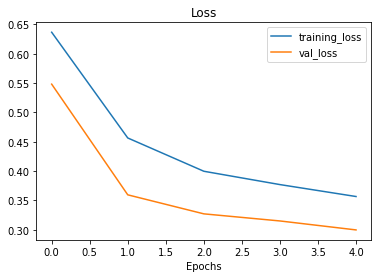

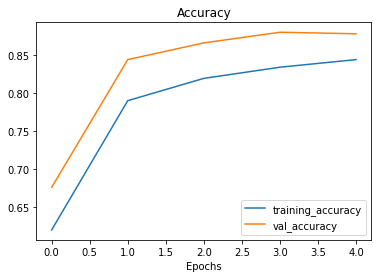

In [36]:
# Plot the loss curves of model_5 results
plot_loss_curves(history_5)

We can now attempt another method of preventing overfitting, data augmentation. To implement data augmentation, we'll have to reinstantiate our `ImageDataGenerator` instances.

In [37]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2, # Shear the image
                                             zoom_range = 0.2, # zoom into the image
                                             width_shift_range = 0.2, # shift the image width arrays
                                             height_shift_range = 0.2, # shift the image height ways)
                                             horizontal_flip = True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our training data, leading it to having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Data augmentation is usually only performed on the training data.

In [38]:
# Import data and augment it from training directory
print('Augmented training images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Not shuffling for demonstration purposes, usually a good thing to shuffle

# Create non_augmented data batches
print('Non-augmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Not shuffling for demonstration purposes

print('Unchanged test images:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')                                                                                                                  

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [39]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

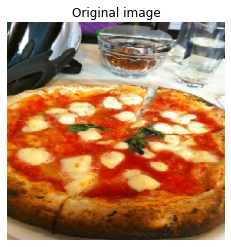

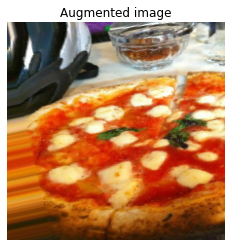

In [40]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we are making batches of 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

Data augmentation is a way to try and prevent a model overfitting. If your model is overfitting (e.g. the validation loss keeps increasing), you may want to try using data augmentation. 

In [41]:
# Create the model (same as model_5)
model_6 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2), # reduce number of features by half
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 540ms/step - loss: 0.7095 - accuracy: 0.4827 - val_loss: 0.6789 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6839 - accuracy: 0.5640 - val_loss: 0.6662 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 25s 535ms/step - loss: 0.6658 - accuracy: 0.5967 - val_loss: 0.6186 - val_accuracy: 0.6440
Epoch 4/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6374 - accuracy: 0.6493 - val_loss: 0.8498 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6000 - accuracy: 0.6860 - val_loss: 0.6406 - val_accuracy: 0.5720


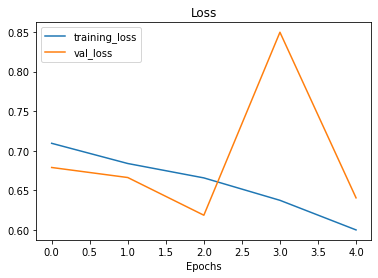

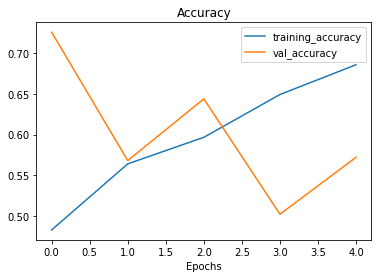

In [42]:
plot_loss_curves(history_6)

Let's see what happens when we shuffle the augmented training data.

In [43]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [44]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 540ms/step - loss: 0.6701 - accuracy: 0.5680 - val_loss: 0.5684 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.5965 - accuracy: 0.6807 - val_loss: 0.4860 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5493 - accuracy: 0.7180 - val_loss: 0.4224 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4960 - accuracy: 0.7660 - val_loss: 0.4817 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.4834 - accuracy: 0.7767 - val_loss: 0.3828 - val_accuracy: 0.8420


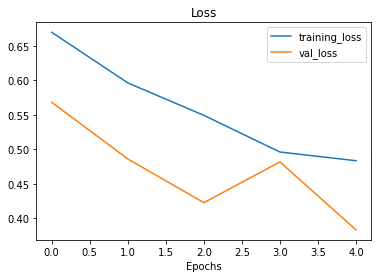

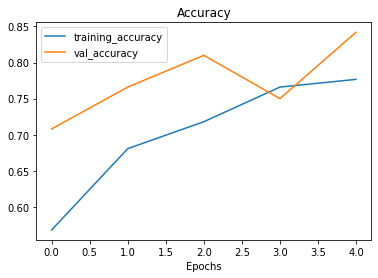

In [45]:
plot_loss_curves(history_7)

#### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers are not set in stone either, they are usually found through trial and error).
* Train for longer (more epochs)
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

In [46]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 36s 768ms/step - loss: 0.6443 - accuracy: 0.6127 - val_loss: 0.5196 - val_accuracy: 0.7900
Epoch 2/10
47/47 [==============================] - 33s 697ms/step - loss: 0.5354 - accuracy: 0.7333 - val_loss: 0.4163 - val_accuracy: 0.8000
Epoch 3/10
47/47 [==============================] - 28s 587ms/step - loss: 0.4955 - accuracy: 0.7640 - val_loss: 0.3723 - val_accuracy: 0.8300
Epoch 4/10
47/47 [==============================] - 25s 530ms/step - loss: 0.4675 - accuracy: 0.7833 - val_loss: 0.3180 - val_accuracy: 0.8740
Epoch 5/10
47/47 [==============================] - 26s 545ms/step - loss: 0.4332 - accuracy: 0.8073 - val_loss: 0.3080 - val_accuracy: 0.8720
Epoch 6/10
47/47 [==============================] - 32s 682ms/step - loss: 0.4152 - accuracy: 0.8047 - val_loss: 0.3418 - val_accuracy: 0.8340
Epoch 7/10
47/47 [==============================] - 41s 860ms/step - loss: 0.3953 - accuracy: 0.8240 - val_loss: 0.2495 - val_accuracy: 0.9060

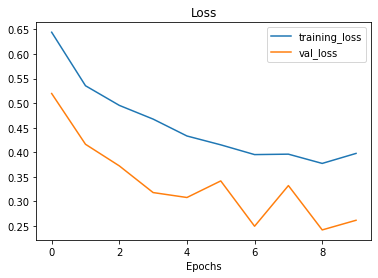

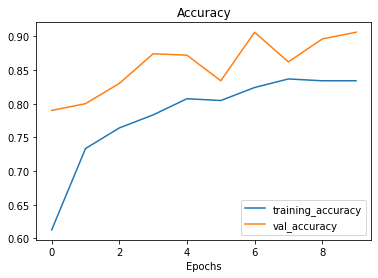

In [47]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

#### Making a prediction with our trained model

In [48]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


--2022-07-12 00:50:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-07-12 00:50:06 (52.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



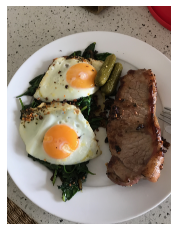

In [49]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [50]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes `(224,224,3)`, we've got to reshape our custom images to use it with our model.

To do so, we can import and decode our image using `tf.io.read_file` (for reading in files) and `tf.image` (for resizing our image and turning it into a tensor).

**Note:** For your model to make predictions on unseen data, for example, your own custom imnages, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [51]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

Now we've got a function to load our custom image, let's load it in.

In [52]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Our model was trained on data in the shape of `(batch_size, 224 ,224 ,3)`.

We can fix this by adding an extra to our custom image tensor using `tf.expand_dims`.

In [53]:
 # Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [54]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.89802396]], dtype=float32)

The predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Let's write a little function to convert predictions into their class names and then plot the target image.

In [55]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [56]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

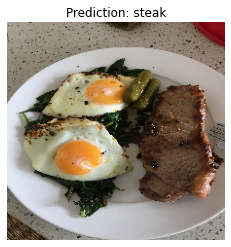

In [57]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-07-12 00:50:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-07-12 00:50:09 (66.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



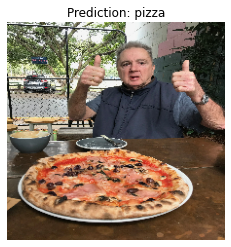

In [58]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification

#### 1. Import and become one with the data

In [59]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-12 00:50:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   132MB/s    in 3.7s    

2022-07-12 00:50:13 (132 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [60]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [61]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [62]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 384, 3)


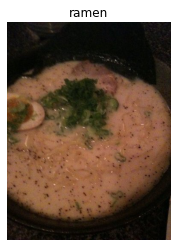

In [63]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # Get a random class name

#### 2. Preprocess the data

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Why is the image 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

#### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to have 10 output neurons
* Changing the output layer to use `softmax` activation instead of `sigmoid`. 
* Changing loss function to be `categorical_crossentropy` instead of `binary_crossentropy`

In [65]:
# Create our model
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to 10 neurons and 'softmax' activation                     
])

# Compile the model
model_9.compile(loss='categorical_crossentropy', # changed to categorical_crossentropy
                optimizer=Adam(),
                metrics=['accuracy']) 

#### 4. Fit a model

In [66]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 216ms/step - loss: 2.1999 - accuracy: 0.1715 - val_loss: 2.1393 - val_accuracy: 0.2148
Epoch 2/5
235/235 [==============================] - 51s 216ms/step - loss: 1.9819 - accuracy: 0.2968 - val_loss: 1.8808 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.5284 - accuracy: 0.4896 - val_loss: 1.9501 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 0.8987 - accuracy: 0.7097 - val_loss: 2.4568 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.3563 - accuracy: 0.8900 - val_loss: 3.6939 - val_accuracy: 0.2820


#### 5. Evaluate the model

In [67]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 3.6939 - accuracy: 0.2820


[3.693854570388794, 0.28200000524520874]

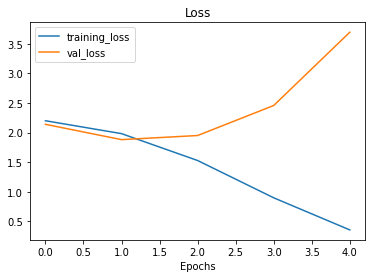

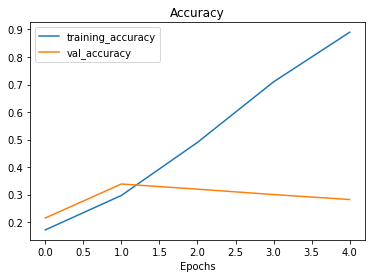

In [68]:
plot_loss_curves(history_9)

It seems our model is **overfitting** the training set pretty bad.

#### 6. Adjust the model parameters

To prevent overfitting we could:
* Get more data
* Simplify model
* Use data augmentation
* Use transfer learning

In [69]:
# Try a simplified model
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')                   
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 208ms/step - loss: 2.1688 - accuracy: 0.2268 - val_loss: 1.9868 - val_accuracy: 0.3060
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.8536 - accuracy: 0.3673 - val_loss: 1.9046 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 49s 208ms/step - loss: 1.5668 - accuracy: 0.4792 - val_loss: 1.9680 - val_accuracy: 0.3260
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 1.1387 - accuracy: 0.6491 - val_loss: 2.1155 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.7076 - accuracy: 0.7915 - val_loss: 2.3475 - val_accuracy: 0.3160


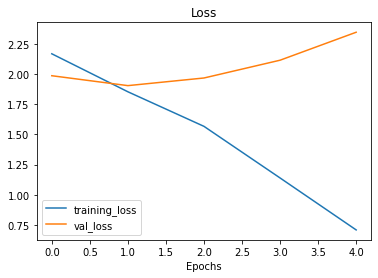

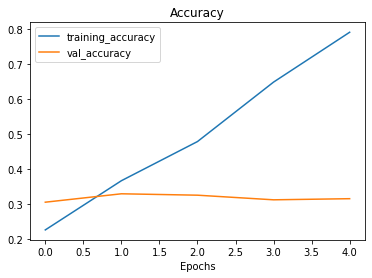

In [70]:
plot_loss_curves(history_10)

We can try data augmentation.

In [71]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Rather than rewrite a model from scratch, we can clone it using a handy function called `clone_model()` which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it will be like training a model from scratch.

**Note:** One of the key practices in deep learning and machine learning in general is to **be a serial experimenter**. Try something, see if it works, then try something else. A good experiment setup also keeps track of the things you change, for example, that is why we use the same model as before but with different data. The model stays the same but the data changes. This will let us know if augmented training data has any influence over performance.

In [72]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model
model_11.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 142s 599ms/step - loss: 2.2904 - accuracy: 0.1917 - val_loss: 2.0262 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 129s 548ms/step - loss: 2.1077 - accuracy: 0.2384 - val_loss: 1.9795 - val_accuracy: 0.3104
Epoch 3/5
235/235 [==============================] - 137s 585ms/step - loss: 2.0720 - accuracy: 0.2664 - val_loss: 1.9353 - val_accuracy: 0.3308
Epoch 4/5
235/235 [==============================] - 130s 552ms/step - loss: 2.0608 - accuracy: 0.2641 - val_loss: 1.9619 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 136s 580ms/step - loss: 2.0376 - accuracy: 0.2811 - val_loss: 1.9524 - val_accuracy: 0.3380


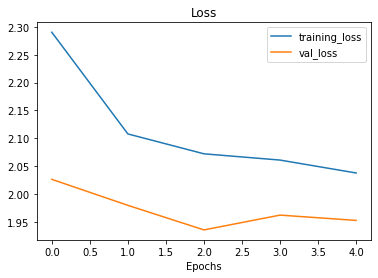

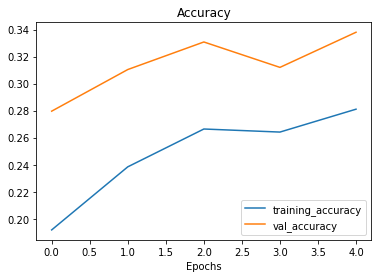

In [73]:
# Check out model performance with augmented data
plot_loss_curves(history_11)

The loss curves are much closer to each other. Although our model did not perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer, the evaluation metrics might continue to improve.

#### 7. Repeat until satisfied

We could keep going here.
* Restucturing the architecture
* Different methods of data augmentation
* Transfer Learning

### Making a prediction with our trained model

In [74]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [75]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


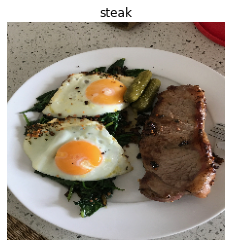

In [79]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [80]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.03132116, 0.13368057, 0.03825211, 0.22005066, 0.10418827,
        0.06796034, 0.03192614, 0.04903044, 0.27904812, 0.04454219]],
      dtype=float32)

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using `argmax` and then use that to index our `class_names` list to output the predicted class.

In [82]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

We can readjust our `pred_and_plot` function to work with multiple classes as well as binary classes.

In [83]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

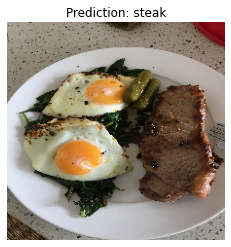

In [84]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

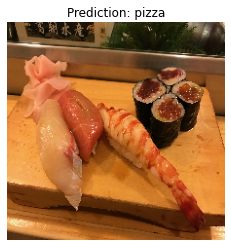

In [85]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

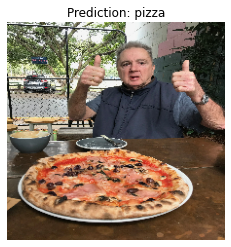

In [86]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

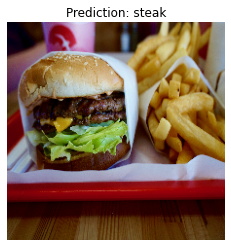

In [87]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Our model's predictions are not very good. This is because it is only performing at ~35% accuracy on the test dataset.

### Saving and loading our model

Once you have trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we use the `save` and `load_model` functions.

In [88]:
# Save a model
model_11.save('saved_train_model')

INFO:tensorflow:Assets written to: saved_train_model/assets


In [90]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model('saved_train_model')
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 14s 177ms/step - loss: 1.9524 - accuracy: 0.3380


[1.9524160623550415, 0.33799999952316284]

In [91]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 1.9524 - accuracy: 0.3380


[1.952416181564331, 0.33799999952316284]